In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('height and weight.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [27]:
df.shape

(15, 2)

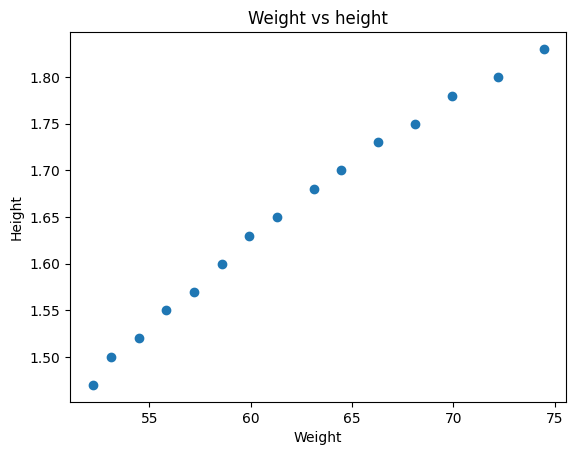

In [28]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs height")
plt.show()

In [29]:
X = df[['Weight']]
y = df['Height']
X , y

(    Weight
 0    52.21
 1    53.12
 2    54.48
 3    55.84
 4    57.20
 5    58.57
 6    59.93
 7    61.29
 8    63.11
 9    64.47
 10   66.28
 11   68.10
 12   69.92
 13   72.19
 14   74.46,
 0     1.47
 1     1.50
 2     1.52
 3     1.55
 4     1.57
 5     1.60
 6     1.63
 7     1.65
 8     1.68
 9     1.70
 10    1.73
 11    1.75
 12    1.78
 13    1.80
 14    1.83
 Name: Height, dtype: float64)

In [30]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 )

In [31]:
X.shape , y.shape

((15, 1), (15,))

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 1), (3, 1), (12,), (3,))

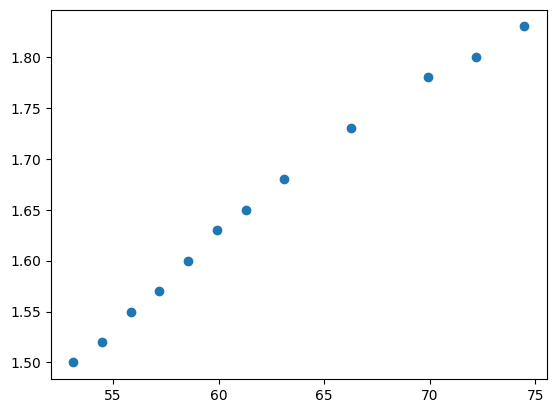

In [33]:
plt.scatter(X_train, y_train)

In [34]:
# Train the model Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
model

LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
print("The coefficient of weight is : ",model.coef_)
print("The intercept of the line is : ",model.intercept_)

The coefficient of weight is :  [0.0156927]
The intercept of the line is :  0.6772604802107353


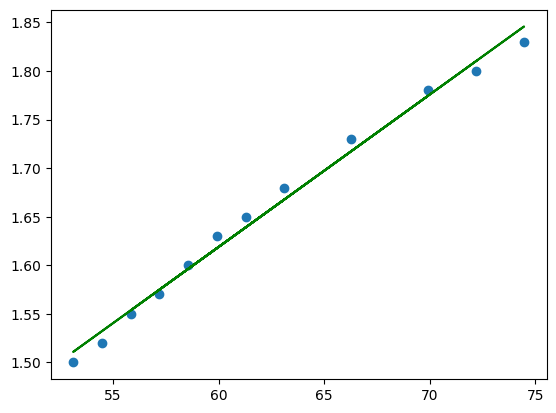

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train),'g')
plt.show()

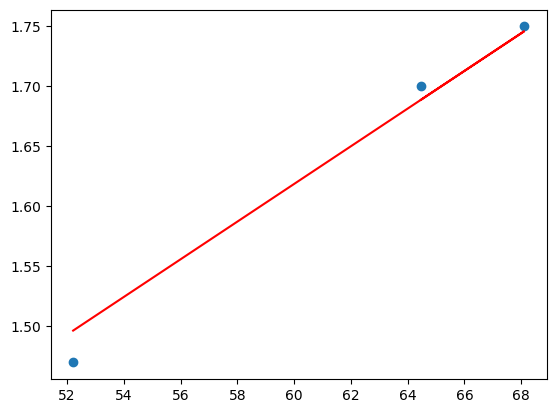

In [42]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.show()

In [43]:
y_pred_test = model.predict(X_test)

In [44]:
y_pred_test, y_test

(array([1.68896884, 1.74593334, 1.49657634]),
 9     1.70
 11    1.75
 0     1.47
 Name: Height, dtype: float64)

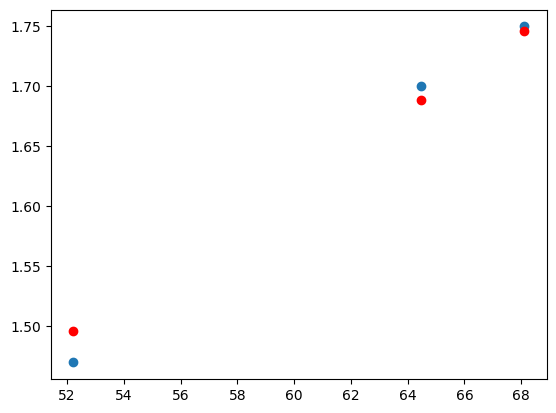

In [45]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, model.predict(X_test), c= 'r')
plt.show()

Performance Matrics
MSE, RMSE, MAE
R2 score, Adjusted R2 Score

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("Mean squared error : ",mse)
print("Mean absolute error : ", mae)
print("Root Mean Squared error : ",rmse)

Mean squared error :  0.000281508678552779
Mean absolute error :  0.013891386742554523
Root Mean Squared error :  0.016778220363101056


In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print(score)
print("R2 score : ",score * 100, '%')

0.9810644386623691
R2 score :  98.10644386623692 %


In [50]:
# Display adjusted R2 score
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1 ) / (len(y_test) - X_test.shape[1]-1)
print("Adjusted R2 Score : ",adjusted_r2 * 100, '%')

Adjusted R2 Score :  96.21288773247383 %


In [53]:
weight = [[100]]

In [54]:
print("The height of the 100 kg person is : ", model.predict(weight))

The height of the 100 kg person is :  [2.24653046]


In [56]:
# Residuals
residuals = y_test - y_pred_test
print(residuals)

9     0.011031
11    0.004067
0    -0.026576
Name: Height, dtype: float64


In [57]:
import seaborn as sns

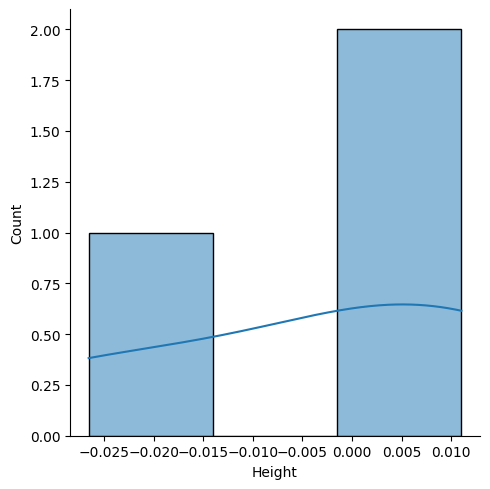

In [58]:
# plot the residuals
sns.displot(residuals, kde = True)

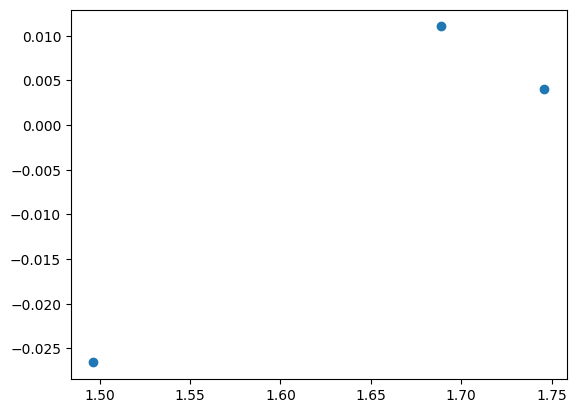

In [59]:
# scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test, residuals)